In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import io
import cv2
import pykalman
from scipy import optimize
import matplotlib as mpl
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmath

# Лабораторная работа 2.3
Построение графиков амплитудного спектра сигнала при частоте дискретизации 5кГц

In [70]:
fz = 5000
f = 50
A1 = 0.2
A2 = 1
A3 = 30
f1 = 10
f2 = 0.2
f3 = 100
t0 = 5

# Задание 1
Функция $$ x(t) = e^{2*\pi*I*f*t} $$

In [85]:
l = -1
r = 1
N = (r  - l ) *fz
s = (r -l)/N
print(s)
x = []
for i in range(N):
    x.append(l+s*i)
d = 1 / (r-l)
fx = [d * p for p in range(int(-N / 2), int(N / 2))] # не включая последнюю точку

0.0002


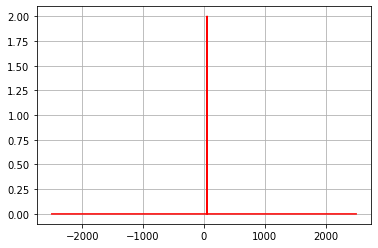

In [86]:
y = [cmath.exp(complex(2 * math.pi * f * t * 1j)) for t in  x]
# с нормировкой по T
d1 = abs(np.fft.fftshift(np.fft.fft(y)*s)) 
#print(d1)
fig1 = plt.figure(1)
axes1 = fig1.subplots(1, 1)
axes1.plot(fx, d1, 'r')
axes1.grid(True)
plt.show()

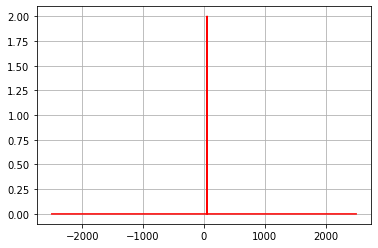

In [87]:
y = [cmath.exp(complex(2 * math.pi * f * t * 1j)) for t in  x]
# с нормировкой по членам
d1 = abs(np.fft.fftshift(np.fft.fft(y))) 
d1*=2/N
d1[0]/=2
#print(d1)
fig1 = plt.figure(1)
axes1 = fig1.subplots(1, 1)
axes1.plot(fx, d1, 'r')
axes1.grid(True)
plt.show()

# Задание 2
$$ x_2(t) = A_1cos(2 \pi f_1 t) + A_2cos(2 \pi f_2 t) + A_3cos(2 \pi f_3 t) $$

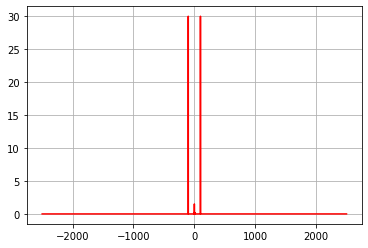

In [88]:
y = [A1*math.cos(2*math.pi * f1* t) + A2*math.cos(2*math.pi * f2* t) + A3*math.cos(2*math.pi * f3* t) for t in  x]
# с нормировкой по T
d1 = abs(np.fft.fftshift(np.fft.fft(y)*s)) 
#print(d1)
fig1 = plt.figure(1)
axes1 = fig1.subplots(1, 1)
axes1.plot(fx, d1, 'r')
axes1.grid(True)
plt.show()

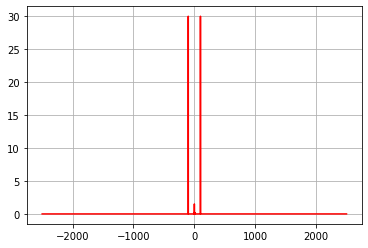

In [89]:
# с нормировкой по членам
d1 = abs(np.fft.fftshift(np.fft.fft(y))) 
d1*=2/N
d1[0]/=2
#print(d1)
fig1 = plt.figure(1)
axes1 = fig1.subplots(1, 1)
axes1.plot(fx, d1, 'r')
axes1.grid(True)
plt.show()

# Задание 3
$$ x_3(t) =  A_1cos(2 \pi f_1 t), если t \leq t_0, иначе A_2cos(2 \pi f_2 t) $$

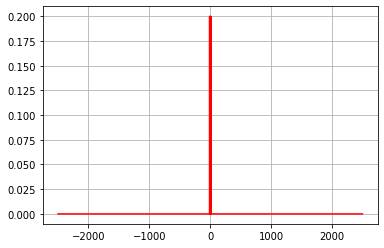

In [90]:
y = []
for t in x:
    if t <= t0:
        y.append(A1*math.cos(2*math.pi * f1* t))
    else:
        y.append(A2*math.cos(2*math.pi * f2* t))
# с нормировкой по T
d1 = abs(np.fft.fftshift(np.fft.fft(y)*s)) 
#print(d1)
fig1 = plt.figure(1)
axes1 = fig1.subplots(1, 1)
axes1.plot(fx, d1, 'r')
axes1.grid(True)
plt.show()

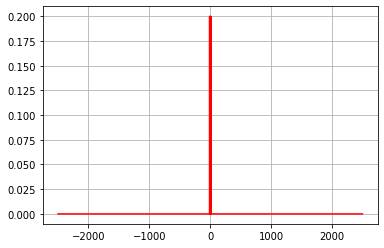

In [91]:
d1 = abs(np.fft.fftshift(np.fft.fft(y))) 
d1*=2/N
d1[0]/=2
#print(d1)
fig1 = plt.figure(1)
axes1 = fig1.subplots(1, 1)
axes1.plot(fx, d1, 'r')
axes1.grid(True)
plt.show()